<p>I have created a new notebook that will serve as an overall record to my progress.  The results from the previous "Selecting Giants..." code have been adapted here.  I have implemented David's suggestion using numpy.where to make cuts in the data.  This has been done in the interest of efficiency  </p>

In [108]:
#Load astropy
from astropy.io import fits
from astropy.table import Table
import numpy

#Load data
spec2 = Table(fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\ssppOut-dr10.fits.gz',1))

#Making cuts in LAMOST data
ind=numpy.where((spec2['TEFF_ADOP']>4050)
    &(spec2['TEFF_ADOP']<5875)
    &(spec2['LOGG_ADOP']<3.8)
    &(spec2['LOGG_ADOP']>0)
    &((spec2['LOGG_ADOP']-1.86)/(spec2['TEFF_ADOP']- 4035)<0.00345))
    
ind
#spec2r=spec2[ind]

(array([     31,     598,     618, ..., 1843153, 1843156, 1843185], dtype=int64),)

<IPython.core.display.Javascript object>


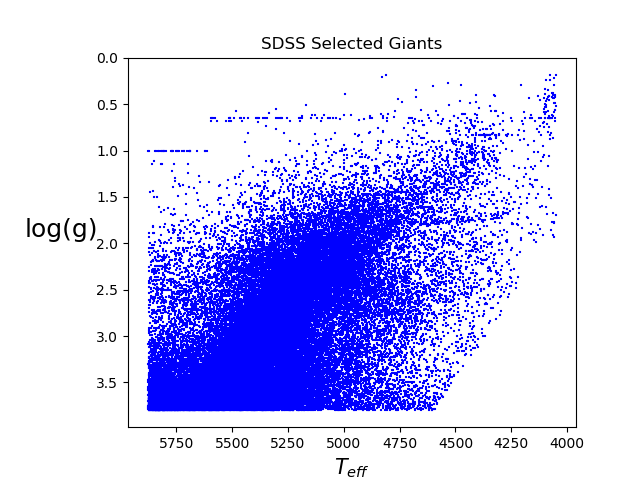

In [6]:
#Plotting logg vs Teff for SDSS data
%matplotlib nbagg
import matplotlib.pyplot as plt
y=spec2r['LOGG_ADOP']
x=spec2r['TEFF_ADOP']

#plt.figure(figsize=(18,18))
plt.scatter(x,y,marker='+',c='blue',s=3)
plt.xlabel('$T_{eff}$',fontsize=15)
plt.ylabel('log(g)',rotation='horizontal',labelpad=25,fontsize=18)
plt.gcf().subplots_adjust(left=0.20)
#plt.xlim(3000,7000)
#plt.ylim(0,6)
plt.figsize=(18,16)

ax=plt.gca()
ax.invert_xaxis()
ax.invert_yaxis()

plt.title('SDSS Selected Giants')

plt.show()

In [ ]:
spec2r.write('ssppgiants.fits', format='fits')

<p>Here I demonstrate that it is unnecessary to make cuts in the LAMOST data as the giants have already been selected  </p>

<IPython.core.display.Javascript object>


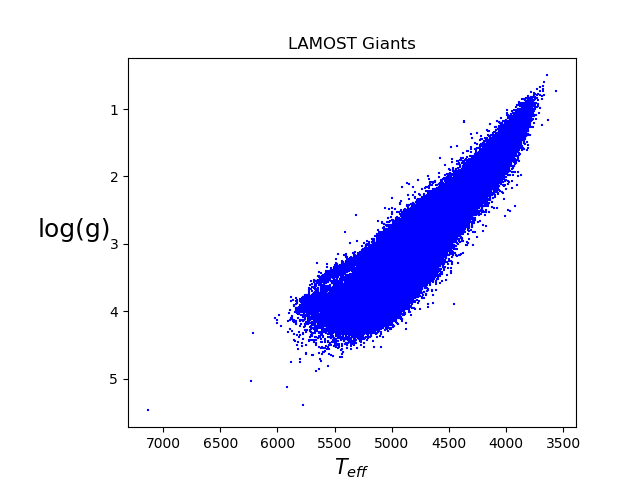

In [3]:
#Load astropy
from astropy.io import fits
from astropy.table import Table
import numpy

#Load LAMOST data
spec3 = Table(fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\Ho2017_Catalog.fits',1))

#Plotting logg vs Teff for LAMOST data
%matplotlib nbagg
import matplotlib.pyplot as plt
y=spec3['logg']
x=spec3['Teff']

#plt.figure(figsize=(18,18))
plt.scatter(x,y,marker='+',c='blue',s=3)
plt.xlabel('$T_{eff}$',fontsize=15)
plt.ylabel('log(g)',rotation='horizontal',labelpad=25,fontsize=18)
plt.gcf().subplots_adjust(left=0.20)
#plt.xlim(3000,7000)
#plt.ylim(0,6)
plt.figsize=(18,16)

ax=plt.gca()
ax.invert_xaxis()
ax.invert_yaxis()

plt.title('LAMOST Giants')

plt.show()

<p>I explored the use of over-density plots rather than scatter plots to show more detail in my graphs. (The LAMOST plot took several hours due to the number of data points). I employed the function gaussian_kde from scipy in order to calculate point density. </p>

<IPython.core.display.Javascript object>


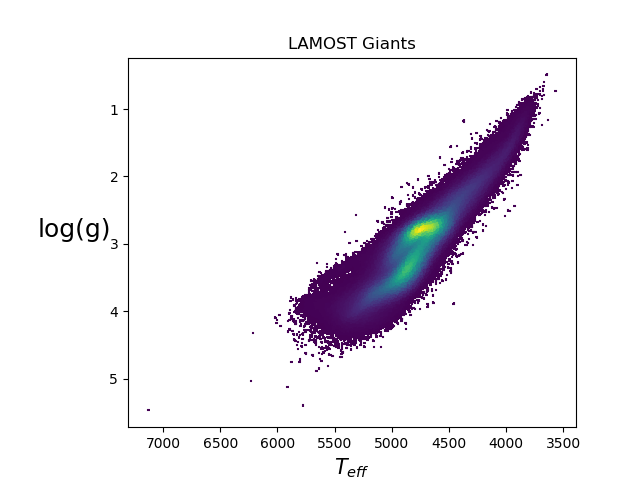

In [14]:
#Load libraries and functions
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kde
from scipy.stats import gaussian_kde

#Load LAMOST data
spec3 = Table(fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\Ho2017_Catalog.fits',1))

#Plotting logg vs Teff for LAMOST data
%matplotlib nbagg
import matplotlib.pyplot as plt
y=spec3['logg']
x=spec3['Teff']

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

#plt.figure(figsize=(18,18))
plt.scatter(x,y,c=z,marker='+',s=3)
plt.xlabel('$T_{eff}$',fontsize=15)
plt.ylabel('log(g)',rotation='horizontal',labelpad=25,fontsize=18)
plt.gcf().subplots_adjust(left=0.20)
#plt.xlim(3000,7000)
#plt.ylim(0,6)
plt.figsize=(18,16)

ax=plt.gca()
ax.invert_xaxis()
ax.invert_yaxis()

plt.title('LAMOST Giants')

plt.show()

<IPython.core.display.Javascript object>


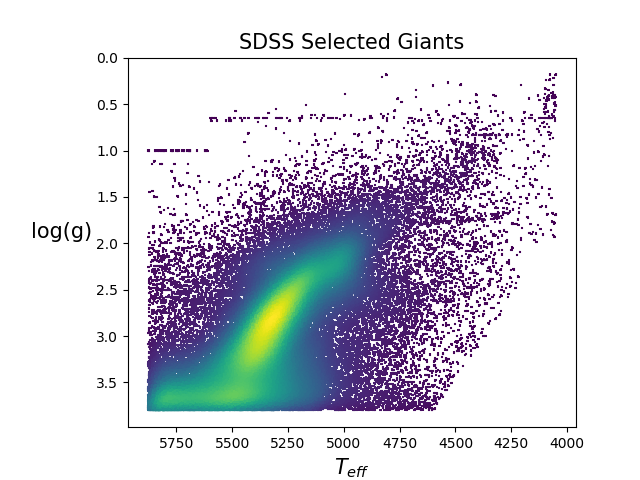

In [3]:
#Plotting logg vs Teff for SDSS data
#Load libraries and functions
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kde
from scipy.stats import gaussian_kde
%matplotlib nbagg
import matplotlib.pyplot as plt

#Define axes/variables
y=spec2r['LOGG_ADOP']
x=spec2r['TEFF_ADOP']

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

#Scatter plot
plt.scatter(x,y,c=z,marker='+',s=3)
plt.xlabel('$T_{eff}$',fontsize=15)
plt.ylabel('log(g)',rotation='horizontal',labelpad=25,fontsize=15)
plt.gcf().subplots_adjust(left=0.20)
plt.figsize=(18,16)
ax=plt.gca()
ax.invert_xaxis()
ax.invert_yaxis()
plt.title('SDSS Selected Giants',fontsize=15)

plt.show()

<p> I loaded the Munn data and prepared for cross-matching. </p>

<IPython.core.display.Javascript object>


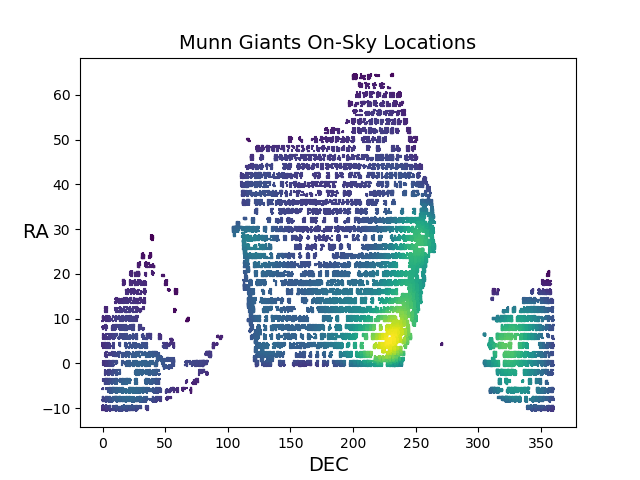

In [4]:
#Plotting RA vs. DEC for Munn data alone
#Load libraries and functions
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kde
from scipy.stats import gaussian_kde
%matplotlib nbagg
import matplotlib.pyplot as plt

#Import DDO51 photometric data
phot = fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\munn_giants.fits',1)

#Set variables for RA and DEC as y and x
y1=phot['DEC']
x1=phot['RA']

# Calculate the point density for Munn Giants
xy = np.vstack([x1,y1])
z = gaussian_kde(xy)(xy)

#Scatter plot
plt.scatter(x1,y1,c=z,marker='+',s=3)
plt.xlabel('DEC',fontsize=14)
plt.ylabel('RA',rotation='horizontal',fontsize=14)
plt.figsize=(18,16)
ax=plt.gca()
plt.title('Munn Giants On-Sky Locations',fontsize=14)

plt.show()

<p>I then loaded the SDSS fitz file with the cuts I had made previously, and cross-matched with the DDO51 photometric data. </p>

In [1]:
#Load libraries and functions
from astropy.io import fits
import numpy as np
from astropy.coordinates import SkyCoord
from astropy import units as u

#Import DDO51 photometric data
phot = fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\munn_giants.fits',1)

#Import the calibration data (i.e. SDSS with cuts)
spec = fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\ssppgiants.fits',1)

#Cross-matching


#defines on-sky locations of photometric data and spectroscopic data as variables
c_phot=SkyCoord(ra=phot['RA']*u.degree,dec=phot['DEC']*u.degree)
c_spec=SkyCoord(ra=spec['RA']*u.degree,dec=spec['DEC']*u.degree)

#d2d represents on-sky distances
idx, d2d, d3d = c_phot.match_to_catalog_sky(c_spec) 
good=(d2d.arcsec < .1)

<p>Plotted the photometric and spectroscopic star locations separately and after cross-matching for comparison.</p>

<IPython.core.display.Javascript object>


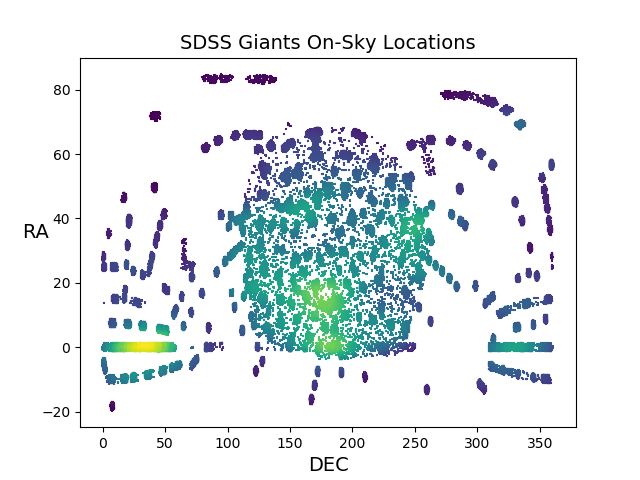

In [7]:
#Import libraries and functions
from scipy.stats import kde
from scipy.stats import gaussian_kde
%matplotlib nbagg

#Set variables for RA and DEC of spec data as y and x
y2=spec['DEC']
x2=spec['RA']

# Calculate the point density for SDSS giants
xy = np.vstack([x2,y2])
z = gaussian_kde(xy)(xy)

#Scatter plot of SDSS sky locations
plt.scatter(x2,y2,c=z,marker='+',s=3)
plt.xlabel('DEC',fontsize=14)
plt.ylabel('RA',rotation='horizontal',fontsize=14)
plt.figsize=(18,16)
plt.title('SDSS Giants On-Sky Locations',fontsize=14)

plt.show()

In [3]:
cmssppgiants=phot[good]

<IPython.core.display.Javascript object>


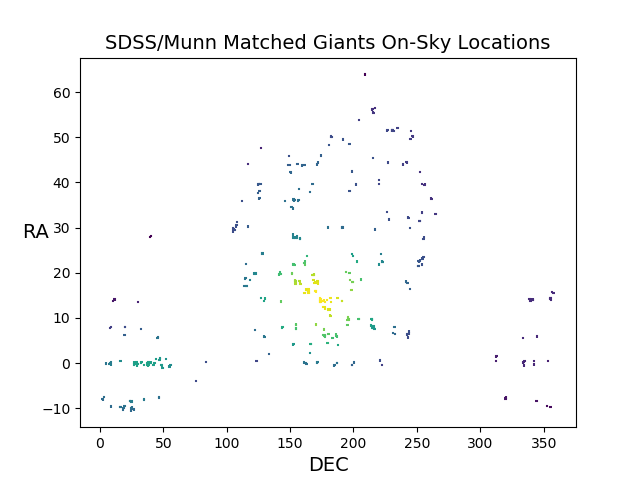

In [15]:
#Import libraries and functions
from scipy.stats import kde
from scipy.stats import gaussian_kde
%matplotlib nbagg

#Set variables for RA and DEC of matched data as y and x
y3=cmssppgiants['DEC']
x3=cmssppgiants['RA']

# Calculate the point density for matched giants
xy1 = np.vstack([x3,y3])
z = gaussian_kde(xy1)(xy1)

#Scatter plot of matched sky locations
plt.scatter(x3,y3,c=z,marker='+',s=3)
plt.xlabel('DEC',fontsize=14)
plt.ylabel('RA',rotation='horizontal',fontsize=14)
plt.figsize=(18,16)
ax=plt.gca()
plt.title('SDSS/Munn Matched Giants On-Sky Locations',fontsize=14)

plt.show()

<p>As far as I understand it, the "good" variable is an index of all the points in phot that have matches in the spec (SDSS) catalog I created.</p>

<p>I read a tutorial online on how to use SkyCoord to perform cross-matching.  A useful plot is the histogram below.  It shows how separated the data points are within d2d (on-sky distance).</p>

<IPython.core.display.Javascript object>


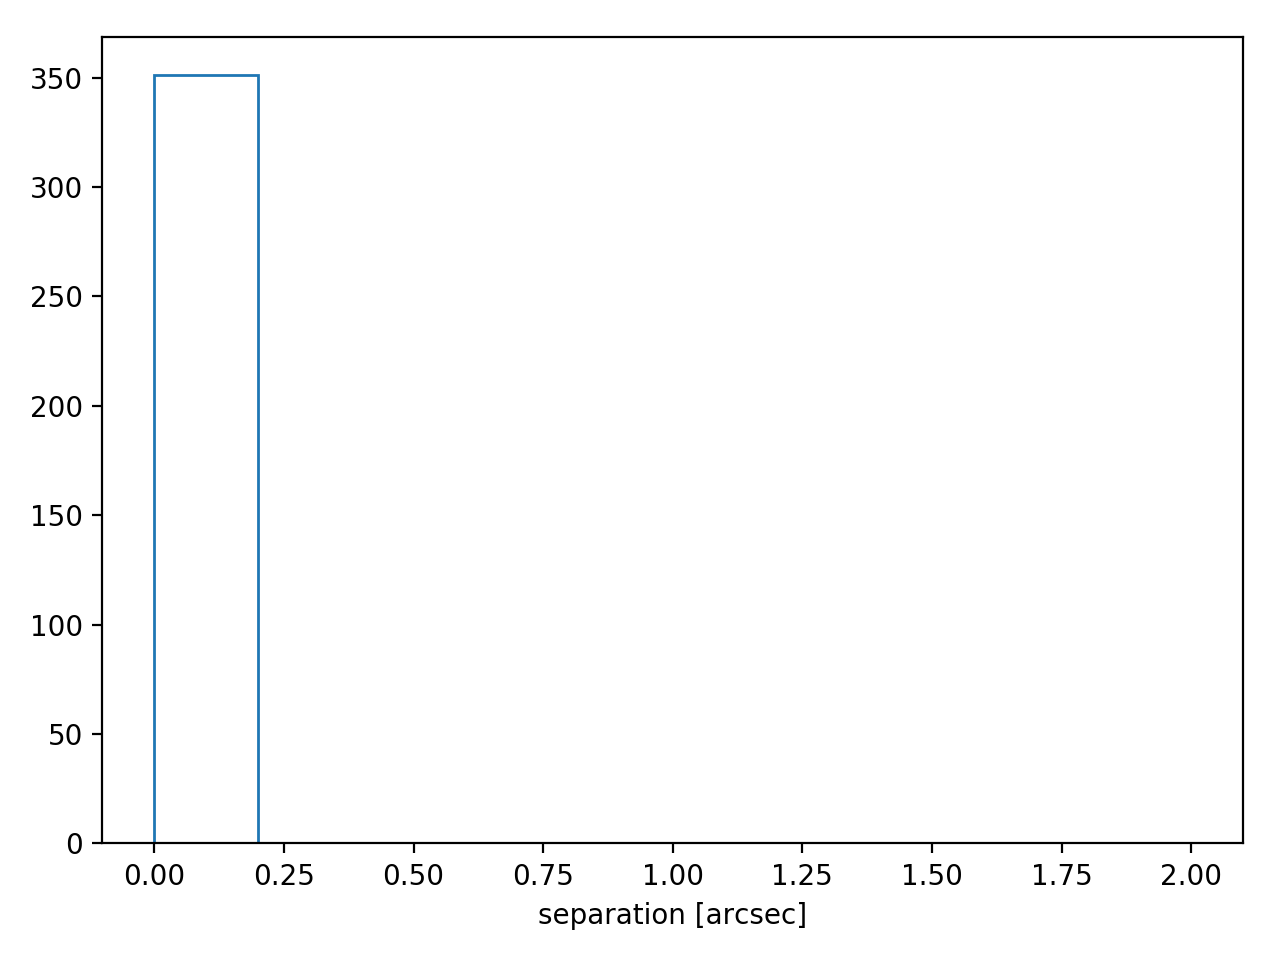

In [2]:
#Import libraries and functions
import matplotlib.pyplot as plt
import numpy as np
%matplotlib nbagg

plt.hist(d2d[good].arcsec, histtype='step', range=(0,2))
plt.xlabel('separation [arcsec]')
plt.tight_layout()

plt.show()

<p>Removing duplicates using KDTREE.</p>

In [4]:
#Import numpy and scipy
import numpy
import scipy

def printRepeating(arr, size):
 
    print("Repeating elements are ",
                         end = '')
    for i in range (0, size):
        for j in range (i + 1, size):
            if arr[i] == arr[j]:
                print(arr[i], end = ' ')
                
printRepeating(cmssppgiants['ra'],351)
#cmssppgiants['ra']

Repeating elements are 199.30981519 252.14295902 230.72666959 

In [ ]:
cmssppgiants['ra']

<p>Apply the same process to cross-match with LAMOST data.</p>

In [148]:
#Load libraries and functions
from astropy.io import fits
import numpy as np
from astropy.coordinates import SkyCoord
from astropy import units as u

#Import DDO51 photometric data
phot = fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\munn_giants.fits',1)

#Import the calibration data (LAMOST)
spec = fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\Ho2017_Catalog.fits',1)

#Cross-matching
#defines on-sky locations of photometric data and spectroscopic data as variables
c_phot=SkyCoord(ra=phot['RA']*u.degree,dec=phot['DEC']*u.degree)
c_spec=SkyCoord(ra=spec['RA']*u.degree,dec=spec['DEC']*u.degree)

#d2d represents on-sky distances
idx, d2d, d3d = c_phot.match_to_catalog_sky(c_spec) 
good=(d2d.arcsec < .1)

<IPython.core.display.Javascript object>


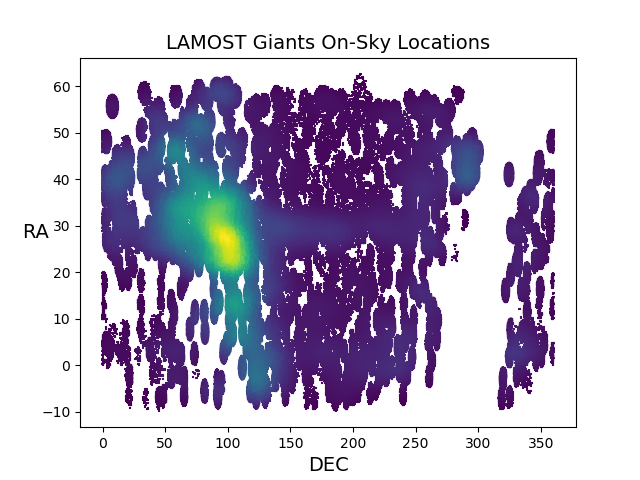

In [103]:
#Import libraries and functions
from scipy.stats import kde
from scipy.stats import gaussian_kde
%matplotlib nbagg

#Set variables for RA and DEC of spec data as y and x
y2=spec['DEC']
x2=spec['RA']

# Calculate the point density for SDSS giants
xy = np.vstack([x2,y2])
z = gaussian_kde(xy)(xy)

#Scatter plot of SDSS sky locations
plt.scatter(x2,y2,c=z,marker='+',s=3)
plt.xlabel('DEC',fontsize=14)
plt.ylabel('RA',rotation='horizontal',fontsize=14)
plt.figsize=(18,16)
plt.title('LAMOST Giants On-Sky Locations',fontsize=14)

plt.show()

In [110]:
LAMOSTgiants=phot[good]

<IPython.core.display.Javascript object>


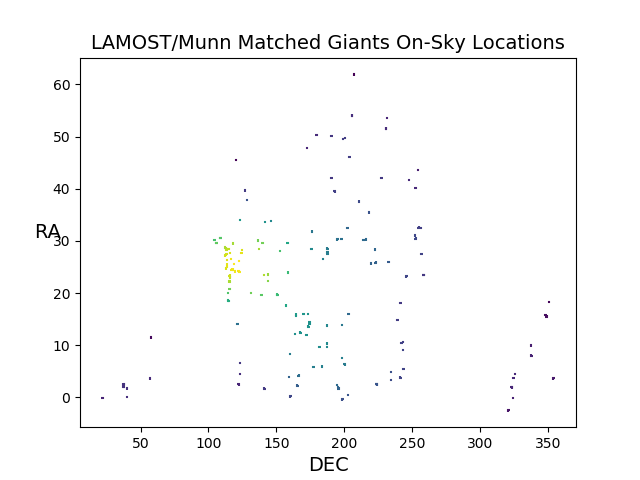

In [111]:
#Import libraries and functions
from scipy.stats import kde
from scipy.stats import gaussian_kde
%matplotlib nbagg

#Set variables for RA and DEC of matched data as y and x
y3=LAMOSTgiants['DEC']
x3=LAMOSTgiants['RA']

# Calculate the point density for matched giants
xy1 = np.vstack([x3,y3])
z = gaussian_kde(xy1)(xy1)

#Scatter plot of matched sky locations
plt.scatter(x3,y3,c=z,marker='+',s=3)
plt.xlabel('DEC',fontsize=14)
plt.ylabel('RA',rotation='horizontal',fontsize=14)
plt.figsize=(18,16)
ax=plt.gca()
plt.title('LAMOST/Munn Matched Giants On-Sky Locations',fontsize=14)

plt.show()

<IPython.core.display.Javascript object>


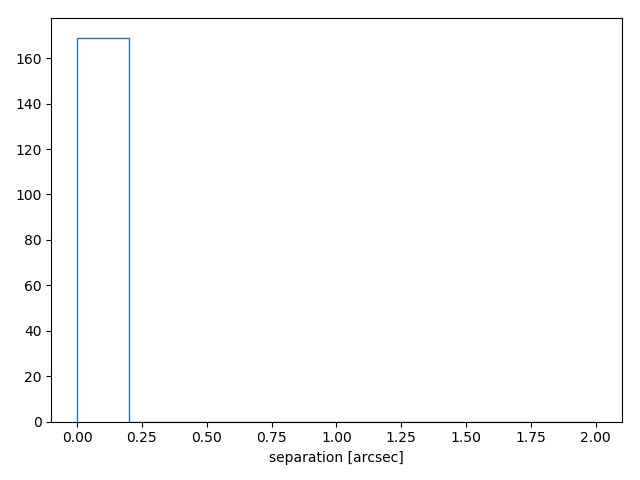

In [149]:
#Import libraries and functions
import matplotlib.pyplot as plt
import numpy as np
%matplotlib nbagg

plt.hist(d2d[good].arcsec, histtype='step', range=(0,2))
plt.xlabel('separation [arcsec]')
plt.tight_layout()

plt.show()

In [142]:
#Import numpy and scipy
import numpy
import scipy

def printRepeating(arr, size):
 
    print("Repeating elements are ",
                         end = '')
    for i in range (0, size):
        for j in range (i + 1, size):
            if arr[i] == arr[j]:
                print(arr[i], end = ' ')
                
printRepeating(LAMOSTgiants['ra'],169)
#LAMOSTgiants['ra']
     

Repeating elements are 258.47925457 108.72498116 105.81014752 230.72666959 205.64084436 223.80790215 

<p>Trying an alternate method for removing duplicates.  I am trying to use np.unique.</p>

In [128]:
#Load libraries and functions
import numpy as np
from astropy.io import fits
from astropy.table import Table
import numpy

arr = np.vstack((cmssppgiants['ra'],cmssppgiants['dec'])).T

def unique_rows(a):
    a = np.ascontiguousarray(a)
    unique_a, indices = np.unique(a.view([('', a.dtype)]*a.shape[1]),return_index=True)
    ordered = np.sort(indices)
    return ordered

index=unique_rows(arr)

#index
cmndSSPPgiants=Table(cmssppgiants[index])
cmndSSPPgiants

OBJID,FIELD,NIGHT,IMAGE,CHIP,RA,DEC,G,GERR,R,RERR,I,IERR,RAWD,RAWDERR,D,DERR,AG,AR,AI,AD,GI0CORR,GD0CORR,DELTA_GD,GISHIFT,GDSHIFT,MT,MD,MT0,MD0,MT0CORR,MD0CORR,M0,M,MERR,T0,T,TERR,GLON,GLAT
int64,str12,str7,int32,int32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
1237667228765257992,96034,g11d328,34,2,45.77416783,5.85176225,19.5476,0.019194,18.7632,0.015372,18.4506,0.017977,17.225,0.047,19.3843,0.0471899,0.450396,0.326665,0.2477,0.450396,0.89423,0.163314,0.1784,0.0,-0.00725044,1.33248,-0.0388451,1.24111,0.0774813,1.24111,0.0774813,19.3454,19.3454,0.019194,0.0,18.0129,0.017977,171.833,-44.1664
1237670015662031041,96034,g11d328,34,3,45.48199275,5.5419325,17.3469,0.016253,16.2203,0.011871,15.7433,0.012923,14.977,0.0057,17.1884,0.00863272,0.409851,0.297258,0.225402,0.409851,1.41916,0.158558,0.274466,0.0,0.00366397,1.79028,-0.150335,1.69891,-0.0340089,1.69891,-0.0340089,17.038,17.038,0.016253,0.0,15.2477,0.012923,171.825,-44.5912
1237654599945551996,92100,g11d328,46,2,133.56336829,2.06843841,15.3071,0.012748,14.4639,0.013642,14.1357,0.010961,12.616,0.0036,15.1783,0.00631683,0.131438,0.09533,0.072286,0.131438,1.11223,0.128739,0.203277,0.0,0.0013034,1.39656,-0.0917349,1.3052,0.0245915,1.3052,0.0245915,15.0866,15.0866,0.012748,0.0,13.69,0.010961,226.07,28.0727
1237669516361400320,96256,g11d333,2,2,344.64987214,5.90260985,17.154,0.019844,16.5008,0.020032,16.206,0.015349,14.695,0.0069,17.03,0.00874802,0.242123,0.175608,0.133158,0.242123,0.838991,0.124001,0.126875,0.0,0.00217327,1.20756,-0.0372524,1.1162,0.0790739,1.1162,0.0790739,16.9927,16.9927,0.019844,0.0,15.7852,0.015349,79.1847,-47.1576
1237669765478154240,96014,g11d363,8,6,19.48152219,6.19393348,15.9351,0.023688,15.1806,0.022655,14.8386,0.017087,13.22,0.0046,15.7906,0.00681947,0.171061,0.124067,0.094077,0.171061,1.01949,0.144522,0.19409,0.0,0.0103405,1.33209,-0.0483027,1.24073,0.0680237,1.24073,0.0680237,15.7423,15.7423,0.023688,0.0,14.4102,0.017087,134.783,-56.067
1237652900231315712,82034,g11d363,14,6,46.42945743,-7.74876867,17.6871,0.025625,16.8443,0.026027,16.4989,0.020385,14.974,0.0059,17.5529,0.00722407,0.327251,0.23735,0.179975,0.327251,1.04088,0.134138,0.190181,0.0,0.00275257,1.41115,-0.0862331,1.31978,0.0300932,1.31978,0.0300932,17.4667,17.4667,0.025625,0.0,16.0556,0.020385,187.848,-52.7741
1237652900768317440,82034,g11d363,14,6,46.60529015,-7.47951181,17.4188,0.015842,16.571,0.015749,16.2091,0.01301,14.686,0.0059,17.2628,0.00722407,0.340764,0.24715,0.187407,0.340764,1.0563,0.155936,0.216331,0.0,0.00275257,1.42993,-0.0659866,1.33857,0.0503397,1.33857,0.0503397,17.1968,17.1968,0.015842,0.0,15.7669,0.01301,187.655,-52.4756
1237658492794372352,96096,g11d363,25,5,129.6695997,5.88984208,18.4771,0.015818,17.8878,0.012489,17.6549,0.01355,15.732,0.0107,18.3057,0.012092,0.133544,0.096857,0.073444,0.133544,0.762089,0.171447,0.164645,0.0,-0.0038265,1.10552,0.0301208,1.01416,0.146447,1.01416,0.146447,18.3358,18.3358,0.015818,0.0,17.2303,0.01355,220.202,26.493
1237667229833036032,98024,g11d365,14,3,32.18141208,7.52313413,16.6501,0.020878,15.5978,0.015765,15.1189,0.023868,13.832,0.0066,16.4296,0.0117943,0.231998,0.168264,0.12759,0.231998,1.42674,0.220517,0.336484,0.0,0.00450048,1.72169,-0.0651875,1.63032,0.0511389,1.63032,0.0511389,16.3644,16.3644,0.020878,0.0,14.6427,0.023868,154.063,-50.6176
